In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [2]:
data=pd.read_csv("iris_dataset.csv.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.shape

(150, 4)

In [5]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [7]:
data.sepal_length.value_counts()

5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal_length, dtype: int64

In [8]:
data1=data.copy()
x=data1.iloc[:,:]

In [9]:
km=KMeans(4)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
identified_clusters=km.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3])

In [11]:
data_with_clusters=data.copy()
data_with_clusters['cluster']=identified_clusters

In [12]:
data_with_clusters

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,2


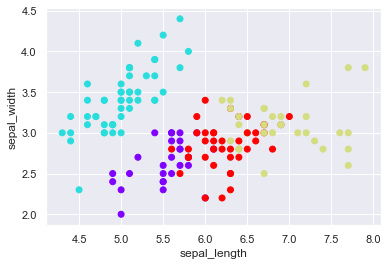

In [13]:
plt.scatter(data_with_clusters['sepal_length'],data_with_clusters['sepal_width'],c=data_with_clusters['cluster'],cmap='rainbow')
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.show()

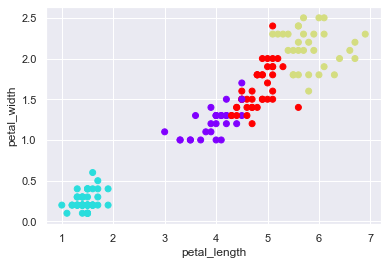

In [14]:
plt.scatter(data_with_clusters['petal_length'],data_with_clusters['petal_width'],c=data_with_clusters['cluster'],cmap='rainbow')
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()


In [15]:
km.inertia_

57.31787321428571

In [19]:
wcss=[]
for i in range(1,15):
    km=KMeans(i)
    km.fit(x)
    wcss_iter=km.inertia_
    wcss.append(wcss_iter)

In [20]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.647725442834144,
 29.963345571095573,
 27.83057575757576,
 26.125502164502166,
 24.27187000572527,
 22.96082212885154,
 21.666314468211528,
 20.483264069264074]

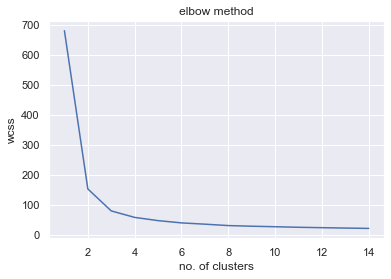

In [21]:
plt.plot(range(1,15),wcss)
plt.title("elbow method")
plt.xlabel("no. of clusters")
plt.ylabel("wcss")
plt.show()

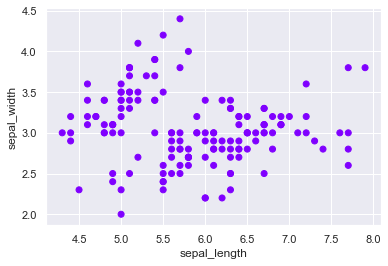

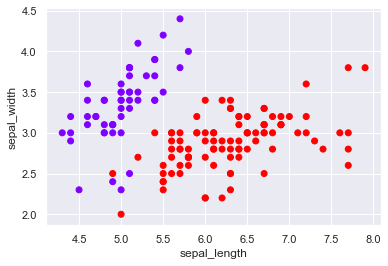

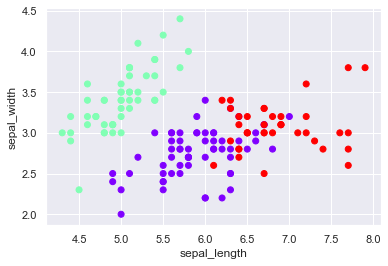

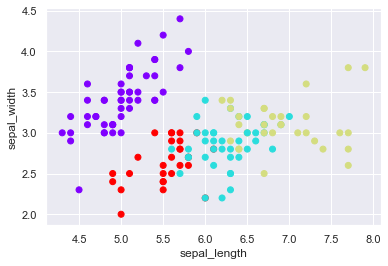

In [24]:
for i in range(1,5):
        km=KMeans(i)
        km.fit(x)
        identified_clusters=km.fit_predict(x)
        data_with_clusters=data.copy()
        data_with_clusters['cluster']=identified_clusters
        plt.scatter(data_with_clusters['sepal_length'],data_with_clusters['sepal_width'],c=data_with_clusters['cluster'],cmap='rainbow')
        plt.xlabel("sepal_length")
        plt.ylabel("sepal_width")
        plt.show()
        

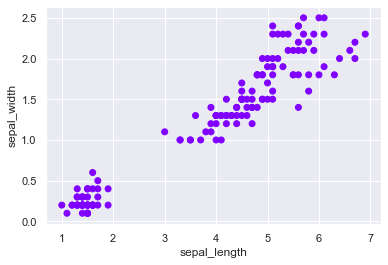

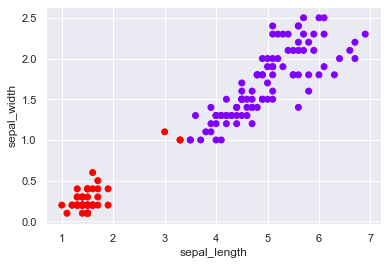

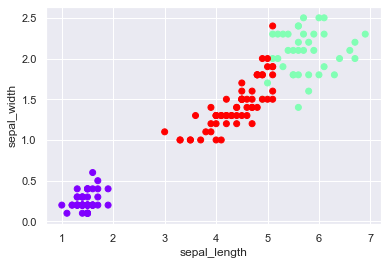

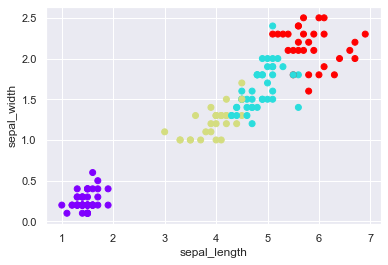

In [25]:
for i in range(1,5):
        km=KMeans(i)
        km.fit(x)
        identified_clusters=km.fit_predict(x)
        data_with_clusters=data.copy()
        data_with_clusters['cluster']=identified_clusters
        plt.scatter(data_with_clusters['petal_length'],data_with_clusters['petal_width'],c=data_with_clusters['cluster'],cmap='rainbow')
        plt.xlabel("sepal_length")
        plt.ylabel("sepal_width")
        plt.show()
        